In [56]:
import hdf5storage
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #데이터 분할을 위해
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,classification_report,roc_curve,auc
import import_ipynb
from RealData_to_csv import reference_s1,reference_s2,reference_s3,reference_s4 ,reference_all


In [57]:
def concat(data): 
    max_n=data.shape[1]   #열 개수 구하기
    data.columns=[i for i in range(max_n)] # columns 값 설정
    return data

In [58]:
def style(data2):
    sty1=data2[['style_1']]
    sty2=data2[['style_2']]
    sty3=data2[['style_3']]
    sty4=data2[['style_4']]
    style_list = [sty1,sty2,sty3,sty4]
    
    return style_list

In [59]:
def concat_style(data,style):    #data + style 합치는 부분
    only_data = data.iloc[:,:-4] #style 값 빼고
    re=pd.concat([only_data,style],axis= 1)
    max_n = re.shape[1]
    re.columns=[i for i in range(max_n)]
    return re

In [60]:
def model(X):
   
    ifor = IsolationForest(n_estimators=100, max_samples=512,contamination=0.0235).fit(X) #모델 생성  
    return ifor

In [61]:
def d_scatter(scores_f):
    
    for i in range(1000):
            plt.scatter(scores_f[0][i],1,color='red',marker='*') #빨간색 = 높은 차원

    for i in range(1000):
        plt.scatter(scores_f[1][i],0.8,color='blue',marker='*')  

    for i in range(1000):
            plt.scatter(scores_f[2][i],0.6,color='black',marker='*') 
    for i in range(1000):
            plt.scatter(scores_f[3][i],0.4,color='pink',marker='*') 
    for i in range(1000):
            plt.scatter(scores_f[4][i],0.2,color='yellow',marker='*') 

In [63]:
def s_scatter(scores_f):  
    for i in range(1000):
            plt.scatter(scores_f[0][i],1,color='red',marker='*') #빨간색 = 높은 차원

    for i in range(1000):
        plt.scatter(scores_f[1][i],0.8,color='blue',marker='*')  

    for i in range(1000):
            plt.scatter(scores_f[2][i],0.6,color='black',marker='*') 
    for i in range(1000):
            plt.scatter(scores_f[3][i],0.4,color='pink',marker='*') 
    

In [64]:
def demension_comp(data):
    
    c_data = []
    ifor = []
    scores_f = []
    n = len(data) 
    for i in range(n):
        c_data.append(concat(data[i]))
    for i in range(n):
        ifor.append(model(c_data[i]))
    for i in range(n):
        scores_f.append(-ifor[i].decision_function(c_data[i]))
    d_scatter(scores_f)
    
    min_max_list = []
    
    for i in range(len(scores_f)):
        min_index, max_index = min_max_index(scores_f[i])   #인덱스 추출
        min_max_list.append(min_index)
        min_max_list.append(max_index)
    
    
    
    return min_max_list

In [65]:
def style_comp(data):
    
    sty_list = style(data)
    s_data =[]
    ifor = []
    scores_f = []
    for i in range(len(sty_list)):
        s_data.append(concat_style(data,sty_list[i]))
    
    for i in range(len(s_data)):
        ifor.append(model(s_data[i]))
    
    for i in range(len(s_data)):
        scores_f.append(-ifor[i].decision_function(s_data[i]))  # 평균 이상치 점수 
    
    s_scatter(scores_f)
    
    min_max_list = []
    
    for i in range(len(scores_f)):
        min_index, max_index = min_max_index(scores_f[i])   #인덱스 추출
        min_max_list.append(min_index)
        min_max_list.append(max_index)
    
    return min_max_list


In [66]:
def min_max_index(scores_f):
    min_f = min(scores_f)
    max_f = max(scores_f)
    
    
    cnt = 0 
    for i in range(len(scores_f)):
        if scores_f[i] == max_f:
            max_index = i
        if scores_f[i] == min_f:
            min_index = i
        cnt +=1
    return min_index, max_index

In [67]:
def d_exam(m_list,r_all):
    demension_list = ['-----------------------300차원-------------------------',
                 '-----------------------100차원-------------------------',
                 '-----------------------50차원-------------------------',
                 '-----------------------30차원-------------------------',
                 '-----------------------10차원-------------------------']
    columns_list = ['★title★','★contents★','★style1★',
                    '★style2★','★style3★','★style4★']
    minmax_list = ['-----------------------min-------------------------',
                  '-----------------------max-------------------------']    
    cnt = 0
    n=0    
    for i in range(10):        
        if i % 2 == 0 :
            print(demension_list[n])
            print(minmax_list[0])
        else :
            print(minmax_list[1])
            
        for j in range(6):
            print(columns_list[j])
            print()
            print(r_all[m_list[i]][j])
            print()
        
        cnt +=1
        if cnt % 2 ==0:
            n+=1

In [68]:
def s_exam(m_list,rlist):
    style_list = ['-----------------------style1-------------------------',
                 '-----------------------style2-------------------------',
                 '-----------------------style3-------------------------',
                 '-----------------------style4-------------------------']
    columns_list = ['★title★','★contents★','★style★']
    minmax_list = ['-----------------------min-------------------------',
                  '-----------------------max-------------------------']
    

    cnt = 0
    n=0
    for i in range(8):        
        if i % 2 == 0 :
            print(style_list[n])
            print(minmax_list[0])
        else :
            print(minmax_list[1])
            
        for j in range(3):
            print(columns_list[j])
            print()
            print(rlist[n][m_list[i]][j])
            print()
        cnt +=1
        if cnt % 2 ==0:
            n+=1
        

In [69]:
file='RealData_300_all.csv'  # 높은 차원 파일
data1 = pd.read_csv(file) 

file2='RealData_100_all.csv'  
data2 = pd.read_csv(file2) 

file3='RealData_50_all.csv'  
data3 = pd.read_csv(file3) 

file4='RealData_30_all.csv'  
data4 = pd.read_csv(file4) 

file5='RealData_10_all.csv' # 낮은 차원 파일
data5 = pd.read_csv(file5) 

data = []
data = [data1,data2,data3,data4,data5]


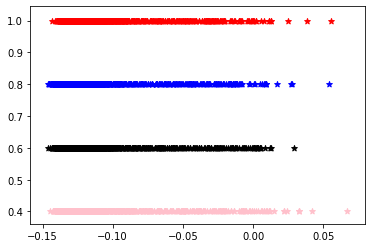

In [70]:
#style에 따른 이상치 점수 비교#
max_min_index=style_comp(data[1]) #100차원으로 설정


In [71]:
rlist = [reference_s1,reference_s2,reference_s3,reference_s4]

s_exam(max_min_index,rlist)
####################################

-----------------------style1-------------------------
-----------------------min-------------------------
★title★

멜타이 스트라이프블라우스

★contents★

타이로 리본을 묶어 연출할 수 있는 블라우스~! 스트라이프패턴으로 더욱 멋스럽게 !   [ 모델 착용 : 와인 , FREE size ]  "리본타이로 사랑스러움을 전해주는 블라우스 ! "  "스트라이프패턴과 컬러배색으로 스타일리시하게~"     오피스룩 ! 데일리룩을 완벽히 선사해줄 블라우스 소개해드려요  요 아이는 스트라이프패턴으로 유행구애없이 매년 꾸준히  착용하실 수 있구요 감각적인 컬러배색으로 더욱 멋스러워요 더군다나 넥라인에 타이로 리본을 묶어 연출하시면  여성스러우면서도 사랑스러운 매력이 톡톡 ~!  여유있는 핏에 차르르 떨어지는 핏이 여리여리한 분위기  살려주구요, 소매부분에 롤업버튼으로 롤업하셔도 센스있구요  긴팔소매기장으로 지금부터 가을까지 꾸준히 착용하실 수 있답니다     FREE 사이즈로 66반분들까지 추천해드려요  개인체형에따라 핏이나 기장이 달라질 수 있으니  구매하기시 전 하단의 사이즈표를 꼭 참고해주세요     모델언니처럼 슬랙스와 매치해 오피스룩으로 연출하셔도 센스있구요  스커트와 코디해 여성스럽게 스타일링하셔도 멋스러워요    실제 색상과 가장 가까운 아래 제품이미지를 확인하세요! 모니터에 따라 차이가 있을 수 있습니다.      색상(Color) 와인(Wine), 블랙(Black), 네이비(Navy)  소재(Material) 폴리에스터(Polyester) 100%  사이즈(Size) FREE  세탁방법(Washing) 드라이크리닝(Dry cleaning),손세탁(Hand wash)  중량(Weight) 190g  제조국(Origin) 대한민국(Korea)      안감 신축성 비침 두께감 촉감  전체안감 매우좋음 비침있음 두꺼움 까슬거림  부분안감 약간당겨짐 비침약간 적당함 

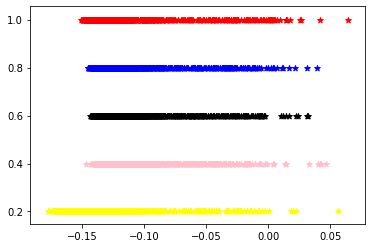

In [72]:
#Demension에 따른 이상치 점수 비교#
max_min_index=demension_comp(data) 

In [73]:
d_exam(max_min_index,reference_all)
################################

-----------------------300차원-------------------------
-----------------------min-------------------------
★title★

펀칭프릴 체크배색블라우스

★contents★

곳곳에 멋스러운 포인트가 넘치는 체크블라우스예요   [ 모델 착용 : 브라운 , FREE size ]   "레이스펀칭과 프릴 디자인으로 사랑스러움이 가득" "소매 컬러배색으로 스타일리시함과 진주버튼으로 여성스러움이 가미된 블라우스"    지금부터 꾸준하게 함께할 수 있는 블라우스 소개해드려요 부드러운 폴리에스터 소재로 기분좋은 착용감을 선사해드리구요  깔끔한 라운드넥 디자인으로 단정한 무드를 연출해드려요 전체 체크패턴으로 매시즌마다 유행에 구애받지않고 함께하실 수 있구요  어깨선부터 챠르르떨어지는 프릴 디자인과 레이스 펀칭 디테일로  사랑스러우면서 세련된 포인트가 가득하구요  살짝 가려지는 핀턱으로 밋밋함없는 센스까지 가득하답니다  소매에는 감각적인 컬러배색으로 스타일리시함과  진주버튼으로 여성스러움이 함께 가미되었구요  맞주름으로 작은 디테일까지 꼼꼼하게 챙겨드렸답니다     FREE 사이즈로 66반분들까지 추천해드려요 개인체형에따라 핏이나 기장이 달라질 수 있으니 구매하기시 전 하단의 사이즈표를 꼭 참고해주세요    데님팬츠와 동안룩으로 스타일링하실 수 있구요 슬랙스와 함께 코디하셔도 멋스럽게 완성된답니다  

★style1★

야외활동

★style2★

일상복

★style3★

걸리쉬

★style4★

장식이 없는

-----------------------max-------------------------
★title★

 블라우스 

★contents★

--

★style1★

격식차린

★style2★

일상복

★style3★

우아한

★style4★

유니크한

-----------------------100차원-------------------------
-----------------